# Dominant Color Extraction for Image Segmentation


In [11]:
import matplotlib.pyplot as plt

In [30]:
import numpy as np

In [13]:
import cv2

In [47]:
im = cv2.imread('Elephant.jpeg')
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(352, 601, 3)


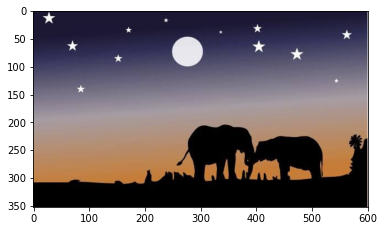

In [17]:
plt.imshow(im)
plt.show()

In [19]:
#Flatten each element of image
all_pixels = im.reshape((-1,3))
print(all_pixels.shape)

(211552, 3)


In [22]:
from sklearn.cluster import KMeans

In [25]:
dominant_colors = 4

km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(n_clusters=4)

In [35]:
centers = km.cluster_centers_

In [38]:
centers = np.array(centers,dtype='uint8')

In [39]:
print(centers)

[[  2   0   1]
 [ 98  95 118]
 [175 145 128]
 [ 38  35  65]]


# Seeing what all colors are these?

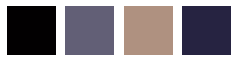

In [41]:
i=1;
plt.figure(0,figsize=(4,2))

colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off") #turning off the grid
    i+=1
    
    colors.append(each_col)
    
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

Upper image show the most dominant color that we have extracted

# Segmenting Our Original Image


In [44]:
new_img = np.zeros((352*601,3),dtype='uint8')

print(new_img.shape)

(211552, 3)


In [45]:
colors

[array([2, 0, 1], dtype=uint8),
 array([ 98,  95, 118], dtype=uint8),
 array([175, 145, 128], dtype=uint8),
 array([38, 35, 65], dtype=uint8)]

In [46]:
km.labels_ #Showing colors id

array([1, 1, 1, ..., 0, 0, 2], dtype=int32)

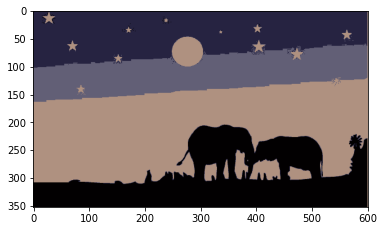

In [49]:
#Now we are gonna iterate over this shape
#We extracted label for every pixel and we mapped it to color we have
#We reshaped our original image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()
    
    


This is the image after Segmentation. 
We have divided the image into 4 colors